In [1]:
import sys
import os

# modify syspath directory to sys.path

package_path = os.path.abspath(os.path.join('..','core'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..','utils'))
if package_path not in sys.path:
    sys.path.append(package_path)

package_path = os.path.abspath(os.path.join('..'))
if package_path not in sys.path:
    sys.path.append(package_path)

import numpy as np
import qutip as qt
import math
import matplotlib.pyplot as plt

from IPython.display import HTML # both needed to disply gifs
from PIL import Image

# Import modules from the package
from core import create_hamiltonian as ch
from core import create_state as cs
from core import create_coherent_state
from core import time_evo
from core import time_evo_new
from core import time_evo_from_state
from core import load_param
from core import load_H_list
from core import load_result
from core import load_tlist
from core import operators
from core.schmidt_solve import compute_schmidt_states_all_time
from core.eigen_ener_states import eigen_ener_states as eig
from core import annihilation_operator
from utils.entropy import compute_VN, plot_VN, compute_VN_time
from utils import collapse_gif
from utils.collapse_gif import collapse_gif
from utils.display_gif import display_gif
from utils.distribution_gif import gif_distribution_eig_total
from utils.distribution_gif import prob_gif
from utils.distribution_gif import gif_distrib_H_s_int
from utils.distribution_gif import gif_distrib_system_first_eig
from utils.plot import plot_basic
from utils.plot import plot_with_binning
from utils.basic_functions import state_distribution_eig_tot
from utils.basic_functions import random_dephasing
from utils.basic_functions import get_state_probabilities
from utils.basic_functions import position
from utils.basic_functions import random_dephasing_energy_basis
from utils.basic_functions import copy_cat
from utils.basic_functions import sum_real_off_diagonal_components
from utils.overlap import overlap
from utils.overlap import gif_schmidt_overlap
from utils.interference import interference_plot
from utils.expectations import exp_val
from utils.expectations import exp_val_time
from utils.plot_hamiltonians import plot_hamiltonians




<img src="outputs/temp/unitary_fund_logo.png" width="500"> <img src="outputs/temp/ACL.png" width="361">


<h1>The ACL model in the litterature<h1>

<h5> 

**Loschmidt echo and the quantum arrow of time** (A. Albrecht,  R. Baunach and A. Arrasmith, "Adapted Caldeira-Leggett Model" (2021))

**Preferred basis problem and emergence of classicality** (A. Adil, M. Rudolph, A. Arrasmith, Z. Holmes, A. Albrecht et al. "A Search for Classical Subsystems in Quantum Worlds" (Mar 16, 2024))

**Envariance,quantum darwinism** (W. Zurek, "Quantum Theory of the Classical: Einselection, Envariance, Quantum Darwinism and Extantons" (Aug 18, 2022))

**Cosmology, Arrow of time, emergence of classical from quantum** (A. Albrecht, R. Baunach, A. Arrasmith,"Einselection, equilibrium, and cosmology" (May 28, 2021))
<h5>

<h3>R. Baunach, A. Albrecht, and A. Arrasmith, “Copycat process in the early stages of einselection”<h3>

Process, whereby for an initially pure quantum state, the second eigenstate of the ACL model copies the first eigenstate. Note that the second eigenstate starts as machine error due to our systems starting as a pure state.

The times are specifically choosen to lineup their positions in the oscillations

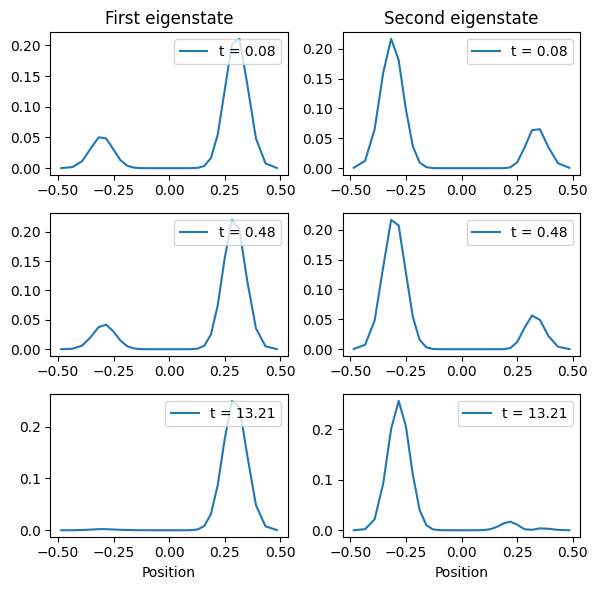

In [2]:
file_name = "coherent_state_decoherence"
info = list(load_param(file_name))
H_list=load_H_list(file_name)
d1=info[0]
result=load_result(file_name)
tlist=load_tlist(file_name)

copy_cat(d1,result,H_list,tlist,1,5,34)

<h3>At equilibrium fluctuations<h3>

This is another metric for visualizing/studying the process of einselection, which happens to be innaccessible in models of master equations. 

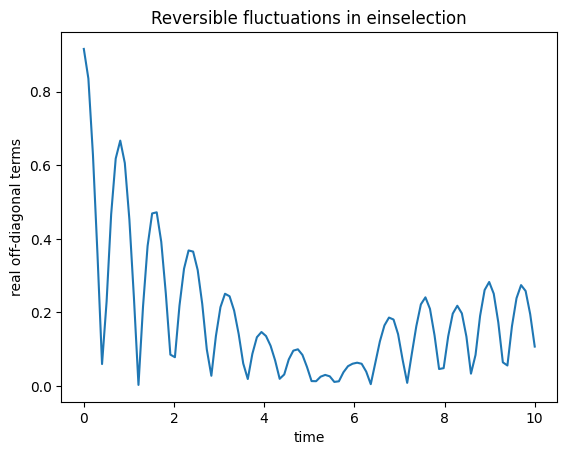

In [3]:
file_name="basic_decoherence"
result=load_result(file_name)
tlist=load_tlist(file_name)
temp = sum_real_off_diagonal_components(result,tlist)

<h1>Current investigations with Andreas Albrecht (UC Davis) and Zoe Holmes (Zoe Holmes)<h1>

<ul>
  <li>Development of preliminary results obtained by Andreas Albrecht on the link between equilibration, thermalization, and dephasing (Equilibration and “Thermalization” in the Adapted Caldeira-Leggett model). Dephasing in the total energy basis vs. the position basis? Absence of thermal properties at equilibrium?</li>
  <li>New phenomenon of sharing of the eigenspace during a branching process. Obtaining the effective eigenspace of worlds from the Hamiltonian spectrum. How does this phenomenon apply in different interaction regimes/branching scenarios, and can we characterize it? What are the implications for quantum computing, notably for error correction?</li>
  <li>Exploring the role of interference in branching/Schmidt states as pre-decoherence worlds.</li>
  <li>Locality from the spectrum. Classicality (pointer states/worlds) leading to local states. What is the role of decoherence in emerging locality?</li>
</ul>

<h3>Equilibriation, thermalization and relation to dehaphasing<h3>

Development of preliminary results obtained by Andreas Albrecht on the link between equilibration, thermalization, and dephasing (Equilibration and “Thermalization” in the Adapted Caldeira-Leggett model). Dephasing in the total energy basis vs. the position basis? Absence of thermal properties at equilibrium?

As we can see, in both of these cases, after a certain time, the energies between the system and environment balance and reach an equilibirum value, martching the time at which entropy is highest. 

In [2]:
file_name="ACL_eq_4_extended"
H_list=load_H_list(file_name)
result=load_result(file_name)
tlist=load_tlist(file_name)

[E_tot,E_s,E_int,E_e]=exp_val_time(result, H_list, tlist)

#getting exp with random dephasing
coherent_state_init=result.states[0]

state_rd_dephase=random_dephasing(coherent_state_init)
exp_1=exp_val(state_rd_dephase, H_list)

#Getting exp with energy dephasing
H=H_list[1]
eigenenergies,eigenstates=H.eigenstates()

dephased_in_ener=random_dephasing_energy_basis(coherent_state_init,H_list)
dephased_state=dephased_in_ener[-1][0]*eigenstates[-1]


/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: divide by zero encountered in log2
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/Users/maringirard/Dev/ACL/utils/entropy.py:10: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


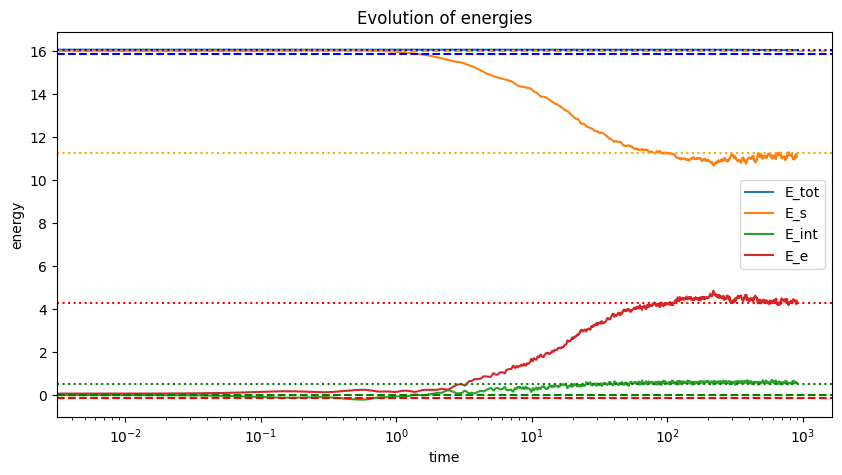

/usr/local/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)


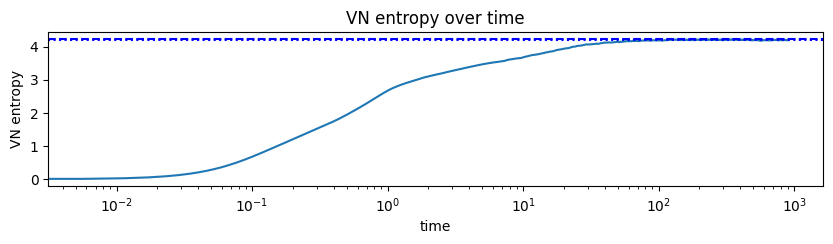

In [3]:
info=list(load_param(file_name))
d1=info[0]
d2=info[1]
d=d1*d2
for i in range(d-1):
    dephased_state=dephased_state+dephased_in_ener[i][0]*eigenstates[i]
exp_2=exp_val(dephased_state,H_list)

densi=dephased_state*dephased_state.dag()
density_matrix = qt.ptrace(densi, [0])  # Calculate the density matrix at the specified time
entropy_value_2 = -np.sum(np.nan_to_num(np.log2(np.linalg.eigvals(density_matrix.full())) * np.linalg.eigvals(density_matrix.full())))
entropy_value_1=max(compute_VN_time(result,tlist))

plt.figure(figsize=(10, 5))
plt.plot(tlist,E_tot)
plt.plot(tlist,E_s)
plt.plot(tlist,E_int)
plt.plot(tlist,E_e)
plt.axhline(y=exp_1[0], color='blue', linestyle='--')
plt.axhline(y=exp_1[1], color='orange', linestyle='--')
plt.axhline(y=exp_1[2], color='green', linestyle='--')
plt.axhline(y=exp_1[3], color='red', linestyle='--')
plt.axhline(y=exp_2[0], color='blue', linestyle=':')
plt.axhline(y=exp_2[1], color='orange', linestyle=':')
plt.axhline(y=exp_2[2], color='green', linestyle=':')
plt.axhline(y=exp_2[3], color='red', linestyle=':')

plt.xscale("log")
plt.legend(["E_tot","E_s","E_int","E_e"])
plt.title("Evolution of energies")
plt.xlabel("time")
plt.ylabel("energy")
plt.show()

plot_VN(result,tlist,1)
plt.axhline(y=entropy_value_1, color='blue', linestyle='--')
plt.axhline(y=entropy_value_2, color='blue', linestyle=':')

plt.show()

Note that Andreas Albrecht has studied the abscence of thermalization in the presence of equilibriation in the ACL model. ie, for different initial states of the same energy, we have different equilibriums in the energy balance of $E_s$ and $E_e$.

<h3>Energy-splitting<h3>

New phenomena of sharing of the eigenspace during a branching process. Obtaining the effective eigenspace of worlds from Hamiltonian spectrum. How does this phenomena apply in different interaction regimes/branching scenarios, can we characterize it? What are the implications for quantum computing, notably for error correction?

We have a good theoretical explanation for the simplest deocherence models, now we want to investigate more complex regimes using the ACL. **Could be a paper!**

In [10]:
display_gif("../outputs/gifs/distrib_param_[10, 200, 1.0, 0.055, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 15, 100, 0].gif")
display_gif("../outputs/gifs/distrib_param_[10, 200, 1.0, 0.075, 0, 1, 0, [0, 0, 0, 0.5477225575051661, 0, 0, 0, 0.8366600265340756, 0, 0], [0], 20, 100, 0, 0]_zoom_True.gif")

We make this apparent by looking at overlaps for various parametrization of the ACL model. 

In blue the overlap between the full state and world 1, in orange the overlap between the full states and world 2 and in green the overlap between the two worlds. 

<img src="outputs/temp/overlap_characterize.png" width="1000">

<h3>Other topics in exploration:<h3>

<h3>-The role of Schmidt states as pre-branching worlds<h3>
<h3>-Exploring the role of interference in branching/Schmidt states as pre-decoherence worlds.<h3>
<h3>-Locality from classicality<h3>

In [7]:
display_gif("outputs/temp/concentration_gif.gif")